<a href="https://colab.research.google.com/github/Joel-Vijo/Word2Vec/blob/main/CBOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
from collections import Counter
import matplotlib.pyplot as plt
from torch.nn.functional import normalize

In [2]:
def make_context_vector(context, word_to_ix,vocab_size):
    idxs=torch.zeros(len(context),vocab_size)
    i=0
    for w in context:
      idxs[i,word_to_ix[w]]=1
      i+=1
    return idxs
    

In [3]:
raw_text = """VNIT was a place with void scope for innovation in the field of robotics. Three enthusiastic youth from the different departments, but with same zeal, passion, perseverance and by their overwhelming contribution ,led to the dawn of robotics in VNIT Nagpur. With a smaller area and fewer funds, they sustained their interest and this audacious step bore fruits as their hard work converted into reality by the build of their first bipeds, snake robots and blind assisting devices.Our team is passionate about building robots for the greater good. We manage funds by our own, and with the unconditional support of our alumni. Not only do we build robots, but also propagate our knowledge to the younger lot by conducting workshops on various aspects of robotics, which foster them make them aware of this field. We help them in their endeavor to success. We have come a long way and as we strive for more, there would be greater difficulties ahead and thus our perseverance will never vanish. ​""".split()

In [4]:
context_size = 2
embedding_dim = 100

vocab = set(raw_text)
vocab_size = len(vocab)

word_list = list(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}
print(word_list)

['on', 'be', 'from', '\u200b', 'VNIT', 'perseverance', 'success.', 'strive', 'never', 'endeavor', 'blind', 'for', 'of', 'various', 'as', 'innovation', 'scope', 'younger', 'Three', 'workshops', 'make', 'into', 'robotics', 'converted', 'good.', 'way', 'field.', 'alumni.', 'place', 'own,', 'work', 'hard', 'them', 'youth', 'manage', 'same', 'aspects', 'we', 'foster', 'funds,', 'robots,', 'only', 'robotics,', 'more,', 'about', 'do', 'also', 'robotics.', 'would', 'have', 'contribution', 'enthusiastic', 'a', ',led', 'aware', 'devices.Our', 'propagate', 'to', 'in', 'snake', 'with', 'support', 'will', 'funds', 'bipeds,', 'lot', 'passion,', 'area', 'knowledge', 'help', 'which', 'come', 'audacious', 'unconditional', 'departments,', 'void', 'there', 'and', 'sustained', 'smaller', 'the', 'by', 'step', 'interest', 'passionate', 'long', 'With', 'Nagpur.', 'bore', 'is', 'conducting', 'team', 'different', 'but', 'Not', 'thus', 'fewer', 'they', 'greater', 'building', 'assisting', 'field', 'was', 'overwh

In [5]:
def CBOW(raw_text, window_size=2):
    data = []
    for i in range(window_size, len(raw_text) - window_size):
        context = [raw_text[i - window_size], raw_text[i - (window_size - 1)], raw_text[i + (window_size - 1)], raw_text[i + window_size]]
        target = raw_text[i]
        data.append((context, target))

    return data


data = CBOW(raw_text)
print(data)

[(['VNIT', 'was', 'place', 'with'], 'a'), (['was', 'a', 'with', 'void'], 'place'), (['a', 'place', 'void', 'scope'], 'with'), (['place', 'with', 'scope', 'for'], 'void'), (['with', 'void', 'for', 'innovation'], 'scope'), (['void', 'scope', 'innovation', 'in'], 'for'), (['scope', 'for', 'in', 'the'], 'innovation'), (['for', 'innovation', 'the', 'field'], 'in'), (['innovation', 'in', 'field', 'of'], 'the'), (['in', 'the', 'of', 'robotics.'], 'field'), (['the', 'field', 'robotics.', 'Three'], 'of'), (['field', 'of', 'Three', 'enthusiastic'], 'robotics.'), (['of', 'robotics.', 'enthusiastic', 'youth'], 'Three'), (['robotics.', 'Three', 'youth', 'from'], 'enthusiastic'), (['Three', 'enthusiastic', 'from', 'the'], 'youth'), (['enthusiastic', 'youth', 'the', 'different'], 'from'), (['youth', 'from', 'different', 'departments,'], 'the'), (['from', 'the', 'departments,', 'but'], 'different'), (['the', 'different', 'but', 'with'], 'departments,'), (['different', 'departments,', 'with', 'same'], 

In [6]:
class CBOW_Model(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW_Model, self).__init__()
        self.n_embed=embedding_dim
        self.embeddings = nn.Linear(vocab_size,embedding_dim)
        self.activation = nn.LogSoftmax(dim=-1)
        self.linear = nn.Linear(embedding_dim, vocab_size)
      
    def forward(self, inputs):
        input=torch.mean(inputs,0,True)
        embeds = self.embeddings(input)
        out = self.linear(embeds)
        out = self.activation(out)
        return out
        
    def get_word_emdedding(self, word):
        w = torch.zeros(1,vocab_size)
        w[0,word_to_ix[word]]=1
        return self.embeddings(w).view(1,-1)
    

In [7]:

model = CBOW_Model(vocab_size, embedding_dim)

loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [8]:
#TRAINING
losses=[]
for epoch in range(350):
    total_loss = 0
    n=0
    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix,vocab_size) 
        log_probs = model(context_vector)
        loss = loss_function(log_probs, torch.tensor([word_to_ix[target]]))
        total_loss+=loss
        n+=1
    if(epoch%10==0):
      print(total_loss.item()/n)
    losses.append(total_loss.item()/n)
    #print(total_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

4.773348552424733
4.614468830387767
4.531252605159108
4.505633470488758
4.484501164133956
4.461810228301258
4.435968538609947
4.40568393614234
4.369538842177972
4.325926245712653
4.273053052948742
4.208988468821456
4.131809885908917
4.039826555949886
3.931806610851753
3.8071973847179876
3.6661723067120806
3.509517018387957
3.338419472298971
3.154327392578125
2.958969674459318
2.754506553091654
2.5436477661132812
2.3296465990020008
2.116165719381193
1.9070851395769817
1.7062351878096418
1.5170954262338034
1.342493103771675
1.1843585502810594
1.0436007802079363
0.9201262869485994
0.8130096807712461
0.7207655092565025
0.6416297075225086


[4.773348552424733, 4.756937910870808, 4.74100029177782, 4.725277040062881, 4.709569791468178, 4.693760197337081, 4.6778013648056405, 4.661716368140244, 4.645636581793064, 4.6297834442883, 4.614468830387767, 4.600062672684833, 4.586920761480564, 4.575318499309261, 4.565369396674924, 4.557010929758956, 4.550050316787347, 4.544225181021342, 4.539283194193026, 4.5350114775867, 4.531252605159108, 4.5278871117568595, 4.524825305473514, 4.522000568669017, 4.519363031154725, 4.516869893888148, 4.514488406297637, 4.512194749785633, 4.509962128429878, 4.507781238090701, 4.505633470488758, 4.503509893649962, 4.501401947765816, 4.49930591118045, 4.497210618926258, 4.495111977181783, 4.493012218940549, 4.490903156559642, 4.488783673542302, 4.486651536895008, 4.484501164133956, 4.4823362769150155, 4.4801524092511436, 4.477946211652058, 4.475719544945694, 4.47346645448266, 4.471191778415587, 4.4688873291015625, 4.466560549852325, 4.464198787037919, 4.461810228301258, 4.459389291158536, 4.45693411478

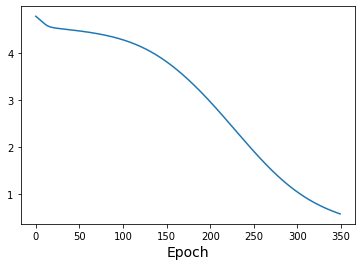

In [9]:
fig = plt.figure()
plt.xlabel('Epoch', fontsize=14)
plt.plot(losses)
print(losses)

In [10]:
#TESTING
context = ['place', 'with', 'scope', 'for']
context_vector = make_context_vector(context, word_to_ix,vocab_size)
a = model(context_vector)


In [11]:
#Print result
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Context: ['place', 'with', 'scope', 'for']

Prediction: void


In [12]:

context = 'VNIT'
context2 = 'with'
b = model.get_word_emdedding(context)
c = model.get_word_emdedding(context2)
d = normalize(b[0], p=1.0, dim = 0)
e = normalize(c[0], p=1.0, dim = 0)
m = torch.dot(d,e).item()
print(m)

0.006155089475214481
